In [1]:
import nbimporter # to import methods from another notebook
import manta_file_processing as mfp
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import time
import random
import os

Importing Jupyter notebook from manta_file_processing.ipynb


In [2]:
heatmap_order=("left-eye","right-eye","left-gill","right-gill","tail")

In [3]:
from importlib import reload
reload(mfp)

Importing Jupyter notebook from manta_file_processing.ipynb


<module 'manta_file_processing' from 'manta_file_processing.ipynb'>

In [4]:
if os.name=="nt":
    folder="C:\\YandexDisk\\_QUT\\Project_1\\MAntas_imag\\0_manta_selected_annotated_some"
else:
    folder="/tf/notebooks/data/0_manta_selected_annotated_some"
print("os = "+os.name)
print("folder: "+folder+"\n ---\ncollecting...")
dataset=mfp.get_manta_files(folder=folder)

os = posix
folder: /tf/notebooks/data/0_manta_selected_annotated_some
 ---
collecting...
total:1801
labelled:295


In [5]:
df=dataset[dataset.body_landmark_path.isnull()==False].sample(frac=1)
manta_data=np.array(df[["image_path","body_landmark_path"]])
#data=np.array([df.image_path,df.body_landmark_path])
manta_data.shape

(295, 2)

In [6]:
image_size=[100]*2
heatmap_size=[59]*2

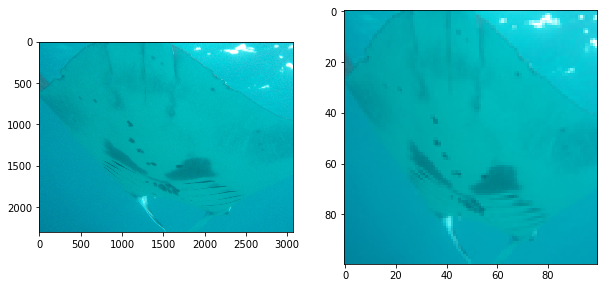

In [7]:
im_path,blm_path = manta_data[56]
image = Image.open(im_path)
body_landmarks=mfp.extract_body_landmarks(blm_path)
heatmaps=mfp.gen_heatmaps(body_landmarks,heatmap_size)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 10))
axes[0].imshow(image)

image1=mfp.image_to_numpy(image,image_size)
axes[1].imshow(mfp.denormalize(image1))    
#axes[2].imshow(image[:,::-1])   
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


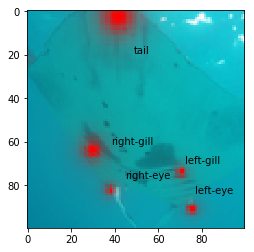

In [8]:
mfp.apply_heatmaps(mfp.denormalize(image1),heatmaps)

In [9]:
def flip_image(image,heatmaps):
    flip_image=image[::-1,:,]
    flip_heatmap=np.moveaxis(heatmaps[::-1,:,],-1,0)
    le,re,lg,rg,t=flip_heatmap
    flip_heatmap=np.array([re,le,rg,lg,t])
    flip_heatmap=np.moveaxis(flip_heatmap,0,-1)
    return flip_image,flip_heatmap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


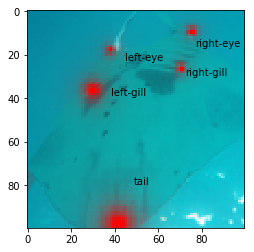

In [10]:
fi,fh=flip_image(mfp.denormalize(image1),heatmaps)
mfp.apply_heatmaps(fi,fh)

In [11]:
X=[]
y=[]
i=0
print ("total:" + str(manta_data.shape[0]))

for im_path,blm_path in manta_data:#[:20]:
    try:
        image = Image.open(im_path)
        body_landmarks=mfp.extract_body_landmarks(blm_path)
    except:
        print(" \n Error on "+blm_path)
        
    image=mfp.image_to_numpy(image,image_size)
    if image.shape[2]>3:
        image=image[:,:,:3]
    numpy_heatmaps=mfp.gen_heatmaps(body_landmarks,heatmap_size=heatmap_size)
    #numpy_heatmaps=mfp.heatmaps_to_numpy(heatmaps)
    
    #if image.shape[2]>3:
    #    image=image[:,:,:3]
        #print("\n More then 3 channels")
        #print(blm_path)
        #numpy_heatmaps=None
    
    if numpy_heatmaps is not None and numpy_heatmaps.sum()>0:
        y.append(numpy_heatmaps)
        X.append(image) 
        flip_img, flip_hm=flip_image(image,numpy_heatmaps)
        y.append(flip_hm)
        X.append(flip_img) 
        
    print(i,end=" ")
    i+=1

X=np.array(X)
y=np.array(y)
print("\n====================")
print("Done.\nX.shape="+str(X.shape))
print("y.shape="+str(y.shape))


total:295
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  
 Error on /tf/notebooks/data/0_manta_selected_annotated_some/0012 Laverna/12-F-20130627-LEI-MichelleOoi-LAVERNA-2.json
43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244

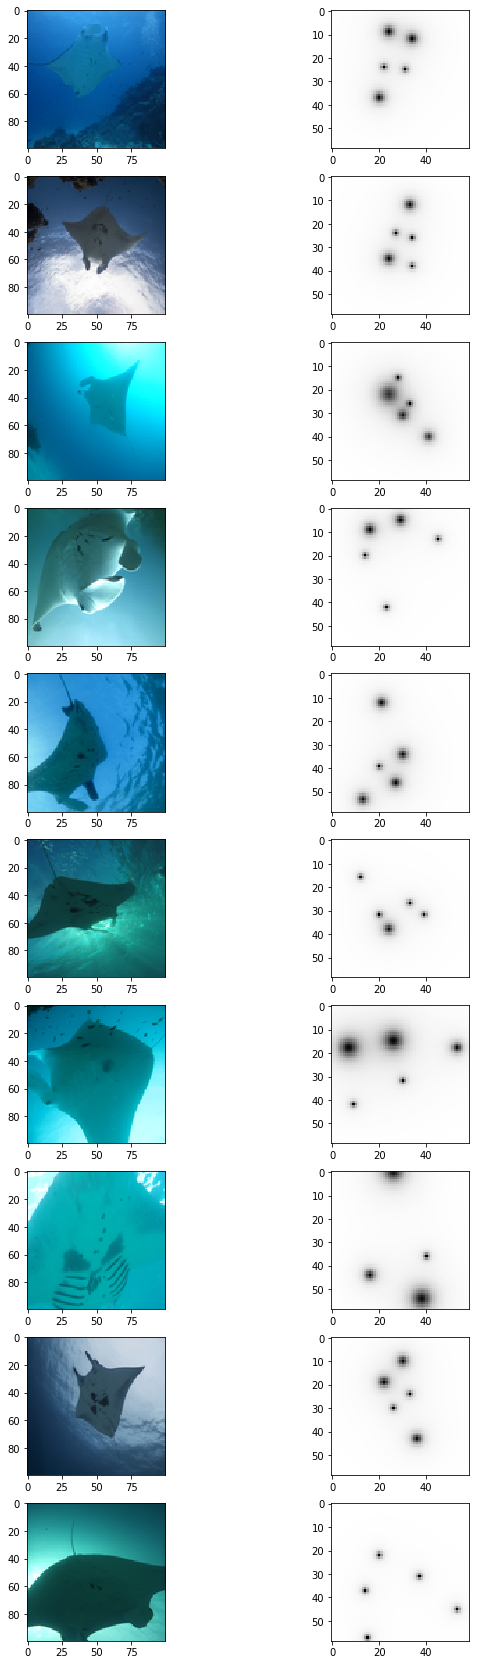

In [12]:
n=10
samples=random.sample(list(np.arange(X.shape[0])),n)
fig, axes = plt.subplots(nrows=n, ncols=2,figsize=(10, 30))
for i,s in zip(range(len(samples)),samples):
    axes[i,0].imshow(mfp.denormalize(X[s]))
    axes[i,1].imshow(y[s].sum(axis=2),cmap='Greys')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


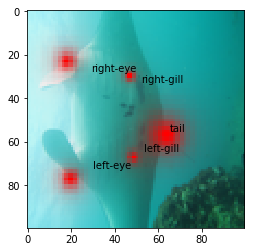

In [13]:
i=100
mfp.apply_heatmaps(mfp.denormalize(X[i]),y[i])
    

In [14]:
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense,Conv2DTranspose
from tensorflow.python.keras.layers import BatchNormalization,AveragePooling2D,Activation
from tensorflow.python.keras.callbacks import EarlyStopping

from tensorflow.python.keras.applications import VGG16
from tensorflow.python.keras.optimizers import Adam

In [15]:
import copy
input_shape=copy.copy(image_size)
input_shape.append(3)
batch_size=32
nb_train_samples=int(round(X.shape[0]*0.95,0))
X_train=X[:nb_train_samples]
X_test =X[nb_train_samples:]
y_train=y[:nb_train_samples]
y_test =y[nb_train_samples:]

In [16]:
#pip install h5py
#pip install cython
#restart jupyther
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=input_shape)
vgg16_net.trainable = False

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
from tensorflow.keras.models import Model
mymodel = Model(vgg16_net.get_input_at(0), vgg16_net.layers[17].get_output_at(0))
mymodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [18]:
model=Sequential()
#model.add(vgg16_net)
model.add(mymodel)

model.add(BatchNormalization())

model.add(Conv2DTranspose(filters=256,
                         kernel_size=3,
                         strides=2, 
                         activation='relu'))
model.add(BatchNormalization())

model.add(Conv2DTranspose(filters=128,
                         kernel_size=3,
                         strides=2, 
                         activation='relu'))
model.add(BatchNormalization())

model.add(Conv2DTranspose(filters=64,
                         kernel_size=3,
                         strides=2, 
                         activation='relu'))
model.add(BatchNormalization())

model.add(Conv2DTranspose(filters=32,
                         kernel_size=3,
                         strides=1, 
                         activation='relu'))
model.add(BatchNormalization())

model.add(Conv2DTranspose(filters=5,
                         kernel_size=3,
                         strides=1, 
                         activation='relu'))
model.add(BatchNormalization())

model.add(Activation('sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
batch_normalization_v1 (Batc (None, 6, 6, 512)         2048      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 13, 13, 256)       1179904   
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 27, 27, 128)       295040    
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 27, 27, 128)       512       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 55, 55, 64)        73792     
__________

In [19]:
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['binary_accuracy'])

In [20]:
start_time = time.time()
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=30)

history=model.fit(X_train,y_train,batch_size=batch_size,epochs=1200,validation_split=0.1,callbacks=[early_stopping_callback])

training_time=round(time.time() - start_time,2)

Train on 504 samples, validate on 56 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1200
504/504 [==============================] - 20s 39ms/sample - loss: 23.2694 - binary_accuracy: 0.0438 - val_loss: 40.0211 - val_binary_accuracy: 0.0156
Epoch 2/1200
504/504 [==============================] - 5s 10ms/sample - loss: 21.9536 - binary_accuracy: 0.0466 - val_loss: 19.5221 - val_binary_accuracy: 0.0278
Epoch 3/1200
504/504 [==============================] - 5s 10ms/sample - loss: 21.3654 - binary_accuracy: 0.0468 - val_loss: 18.6483 - val_binary_accuracy: 0.0281
Epoch 4/1200
504/504 [==============================] - 5s 10ms/sample - loss: 21.0308 - binary_accuracy: 0.0519 - val_loss: 18.7719 - val_binary_accuracy: 0.0285
Epoch 5/1200
504/504 [==============================] - 5s 10ms/sample - loss: 20.7923 - binary_accuracy: 0.0527 - val_loss: 18.4013 - val_binary_accuracy: 0.0285
Epoch 6/1200
504/504 [==============================] - 5s 10ms/sample - loss: 20.5469 - bi

504/504 [==============================] - 5s 10ms/sample - loss: 12.9979 - binary_accuracy: 0.0540 - val_loss: 11.7211 - val_binary_accuracy: 0.0286
Epoch 50/1200
504/504 [==============================] - 5s 10ms/sample - loss: 12.8699 - binary_accuracy: 0.0540 - val_loss: 11.6334 - val_binary_accuracy: 0.0286
Epoch 51/1200
504/504 [==============================] - 5s 10ms/sample - loss: 12.7407 - binary_accuracy: 0.0540 - val_loss: 11.5082 - val_binary_accuracy: 0.0286
Epoch 52/1200
504/504 [==============================] - 5s 10ms/sample - loss: 12.6162 - binary_accuracy: 0.0540 - val_loss: 11.3980 - val_binary_accuracy: 0.0286
Epoch 53/1200
504/504 [==============================] - 5s 10ms/sample - loss: 12.4927 - binary_accuracy: 0.0540 - val_loss: 11.2872 - val_binary_accuracy: 0.0286
Epoch 54/1200
504/504 [==============================] - 5s 10ms/sample - loss: 12.3684 - binary_accuracy: 0.0540 - val_loss: 11.2344 - val_binary_accuracy: 0.0286
Epoch 55/1200
504/504 [=======

504/504 [==============================] - 5s 10ms/sample - loss: 8.2731 - binary_accuracy: 0.0540 - val_loss: 7.5945 - val_binary_accuracy: 0.0286
Epoch 100/1200
504/504 [==============================] - 5s 10ms/sample - loss: 8.2061 - binary_accuracy: 0.0540 - val_loss: 7.5573 - val_binary_accuracy: 0.0286
Epoch 101/1200
504/504 [==============================] - 5s 10ms/sample - loss: 8.1388 - binary_accuracy: 0.0540 - val_loss: 7.4850 - val_binary_accuracy: 0.0286
Epoch 102/1200
504/504 [==============================] - 5s 10ms/sample - loss: 8.0743 - binary_accuracy: 0.0540 - val_loss: 7.4265 - val_binary_accuracy: 0.0286
Epoch 103/1200
504/504 [==============================] - 5s 10ms/sample - loss: 8.0096 - binary_accuracy: 0.0540 - val_loss: 7.3723 - val_binary_accuracy: 0.0286
Epoch 104/1200
504/504 [==============================] - 5s 10ms/sample - loss: 7.9447 - binary_accuracy: 0.0540 - val_loss: 7.3263 - val_binary_accuracy: 0.0286
Epoch 105/1200
504/504 [=============

504/504 [==============================] - 5s 10ms/sample - loss: 5.7490 - binary_accuracy: 0.0540 - val_loss: 5.4022 - val_binary_accuracy: 0.0286
Epoch 150/1200
504/504 [==============================] - 5s 10ms/sample - loss: 5.7132 - binary_accuracy: 0.0540 - val_loss: 5.3586 - val_binary_accuracy: 0.0286
Epoch 151/1200
504/504 [==============================] - 5s 10ms/sample - loss: 5.6771 - binary_accuracy: 0.0540 - val_loss: 5.3590 - val_binary_accuracy: 0.0286
Epoch 152/1200
504/504 [==============================] - 5s 10ms/sample - loss: 5.6438 - binary_accuracy: 0.0540 - val_loss: 5.2833 - val_binary_accuracy: 0.0286
Epoch 153/1200
504/504 [==============================] - 5s 10ms/sample - loss: 5.6050 - binary_accuracy: 0.0540 - val_loss: 5.3008 - val_binary_accuracy: 0.0286
Epoch 154/1200
504/504 [==============================] - 5s 10ms/sample - loss: 5.5686 - binary_accuracy: 0.0540 - val_loss: 5.2630 - val_binary_accuracy: 0.0286
Epoch 155/1200
504/504 [=============

504/504 [==============================] - 5s 10ms/sample - loss: 4.3543 - binary_accuracy: 0.0540 - val_loss: 4.2042 - val_binary_accuracy: 0.0286
Epoch 200/1200
504/504 [==============================] - 5s 10ms/sample - loss: 4.3317 - binary_accuracy: 0.0540 - val_loss: 4.1655 - val_binary_accuracy: 0.0286
Epoch 201/1200
504/504 [==============================] - 5s 10ms/sample - loss: 4.3125 - binary_accuracy: 0.0540 - val_loss: 4.1646 - val_binary_accuracy: 0.0286
Epoch 202/1200
504/504 [==============================] - 5s 10ms/sample - loss: 4.2908 - binary_accuracy: 0.0540 - val_loss: 4.1487 - val_binary_accuracy: 0.0286
Epoch 203/1200
504/504 [==============================] - 5s 10ms/sample - loss: 4.2693 - binary_accuracy: 0.0540 - val_loss: 4.1309 - val_binary_accuracy: 0.0286
Epoch 204/1200
504/504 [==============================] - 5s 10ms/sample - loss: 4.2518 - binary_accuracy: 0.0540 - val_loss: 4.1032 - val_binary_accuracy: 0.0286
Epoch 205/1200
504/504 [=============

504/504 [==============================] - 5s 10ms/sample - loss: 3.5470 - binary_accuracy: 0.0540 - val_loss: 3.5116 - val_binary_accuracy: 0.0286
Epoch 250/1200
504/504 [==============================] - 5s 10ms/sample - loss: 3.5409 - binary_accuracy: 0.0540 - val_loss: 3.5406 - val_binary_accuracy: 0.0286
Epoch 251/1200
504/504 [==============================] - 5s 10ms/sample - loss: 3.5259 - binary_accuracy: 0.0540 - val_loss: 3.4973 - val_binary_accuracy: 0.0286
Epoch 252/1200
504/504 [==============================] - 5s 10ms/sample - loss: 3.5105 - binary_accuracy: 0.0540 - val_loss: 3.4861 - val_binary_accuracy: 0.0286
Epoch 253/1200
504/504 [==============================] - 5s 10ms/sample - loss: 3.5030 - binary_accuracy: 0.0540 - val_loss: 3.4792 - val_binary_accuracy: 0.0286
Epoch 254/1200
504/504 [==============================] - 5s 10ms/sample - loss: 3.4935 - binary_accuracy: 0.0540 - val_loss: 3.4973 - val_binary_accuracy: 0.0286
Epoch 255/1200
504/504 [=============

504/504 [==============================] - 5s 10ms/sample - loss: 3.0861 - binary_accuracy: 0.0540 - val_loss: 3.1538 - val_binary_accuracy: 0.0286
Epoch 300/1200
504/504 [==============================] - 5s 10ms/sample - loss: 3.0783 - binary_accuracy: 0.0540 - val_loss: 3.1462 - val_binary_accuracy: 0.0286
Epoch 301/1200
504/504 [==============================] - 5s 10ms/sample - loss: 3.0722 - binary_accuracy: 0.0540 - val_loss: 3.1386 - val_binary_accuracy: 0.0286
Epoch 302/1200
504/504 [==============================] - 5s 10ms/sample - loss: 3.0625 - binary_accuracy: 0.0540 - val_loss: 3.1295 - val_binary_accuracy: 0.0286
Epoch 303/1200
504/504 [==============================] - 5s 10ms/sample - loss: 3.0571 - binary_accuracy: 0.0540 - val_loss: 3.1285 - val_binary_accuracy: 0.0286
Epoch 304/1200
504/504 [==============================] - 5s 10ms/sample - loss: 3.0532 - binary_accuracy: 0.0540 - val_loss: 3.1221 - val_binary_accuracy: 0.0286
Epoch 305/1200
504/504 [=============

504/504 [==============================] - 5s 10ms/sample - loss: 2.8151 - binary_accuracy: 0.0540 - val_loss: 2.9562 - val_binary_accuracy: 0.0286
Epoch 350/1200
504/504 [==============================] - 5s 10ms/sample - loss: 2.8111 - binary_accuracy: 0.0540 - val_loss: 2.9089 - val_binary_accuracy: 0.0286
Epoch 351/1200
504/504 [==============================] - 5s 10ms/sample - loss: 2.8118 - binary_accuracy: 0.0540 - val_loss: 2.9716 - val_binary_accuracy: 0.0286
Epoch 352/1200
504/504 [==============================] - 5s 10ms/sample - loss: 2.8076 - binary_accuracy: 0.0540 - val_loss: 2.9577 - val_binary_accuracy: 0.0286
Epoch 353/1200
504/504 [==============================] - 5s 10ms/sample - loss: 2.8040 - binary_accuracy: 0.0540 - val_loss: 2.9256 - val_binary_accuracy: 0.0286
Epoch 354/1200
504/504 [==============================] - 5s 10ms/sample - loss: 2.7996 - binary_accuracy: 0.0540 - val_loss: 2.9280 - val_binary_accuracy: 0.0286
Epoch 355/1200
504/504 [=============

504/504 [==============================] - 5s 10ms/sample - loss: 2.6684 - binary_accuracy: 0.0540 - val_loss: 2.8076 - val_binary_accuracy: 0.0286
Epoch 400/1200
504/504 [==============================] - 5s 10ms/sample - loss: 2.6626 - binary_accuracy: 0.0540 - val_loss: 2.8501 - val_binary_accuracy: 0.0286
Epoch 401/1200
504/504 [==============================] - 5s 10ms/sample - loss: 2.6698 - binary_accuracy: 0.0540 - val_loss: 2.8761 - val_binary_accuracy: 0.0286
Epoch 402/1200
504/504 [==============================] - 5s 10ms/sample - loss: 2.6655 - binary_accuracy: 0.0540 - val_loss: 2.8644 - val_binary_accuracy: 0.0286
Epoch 403/1200
504/504 [==============================] - 5s 10ms/sample - loss: 2.6635 - binary_accuracy: 0.0540 - val_loss: 2.8274 - val_binary_accuracy: 0.0286
Epoch 404/1200
504/504 [==============================] - 5s 10ms/sample - loss: 2.6606 - binary_accuracy: 0.0540 - val_loss: 2.8239 - val_binary_accuracy: 0.0286
Epoch 405/1200
504/504 [=============

504/504 [==============================] - 5s 10ms/sample - loss: 2.6004 - binary_accuracy: 0.0540 - val_loss: 2.8111 - val_binary_accuracy: 0.0286
Epoch 450/1200
504/504 [==============================] - 5s 10ms/sample - loss: 2.5937 - binary_accuracy: 0.0540 - val_loss: 2.7915 - val_binary_accuracy: 0.0286
Epoch 451/1200
504/504 [==============================] - 5s 10ms/sample - loss: 2.5937 - binary_accuracy: 0.0540 - val_loss: 2.8478 - val_binary_accuracy: 0.0286
Epoch 452/1200
504/504 [==============================] - 5s 10ms/sample - loss: 2.5962 - binary_accuracy: 0.0540 - val_loss: 2.8457 - val_binary_accuracy: 0.0286
Epoch 453/1200
504/504 [==============================] - 5s 10ms/sample - loss: 2.5934 - binary_accuracy: 0.0540 - val_loss: 2.8156 - val_binary_accuracy: 0.0286
Epoch 454/1200
504/504 [==============================] - 5s 10ms/sample - loss: 2.5894 - binary_accuracy: 0.0540 - val_loss: 2.7821 - val_binary_accuracy: 0.0286
Epoch 455/1200
504/504 [=============


Training time :'--- 37.0 min 47.76999999999998 sec ---


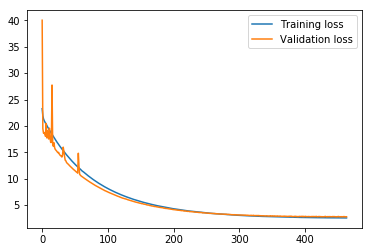

In [21]:
print("\nTraining time :'--- %s min %s sec ---" % (training_time//60,training_time%60) )
loss = history.history['loss']
val_loss= history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Training loss','Validation loss'])
plt.show()

In [22]:
pred=model.predict(X_test)
print(X_test.shape)
print(pred.shape)

(30, 100, 100, 3)
(30, 59, 59, 5)


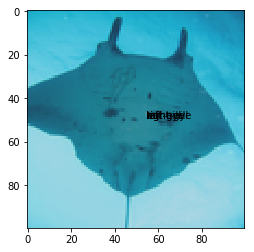

In [23]:
i=14
mfp.apply_heatmaps(mfp.denormalize(X_test[i]),pred[i])

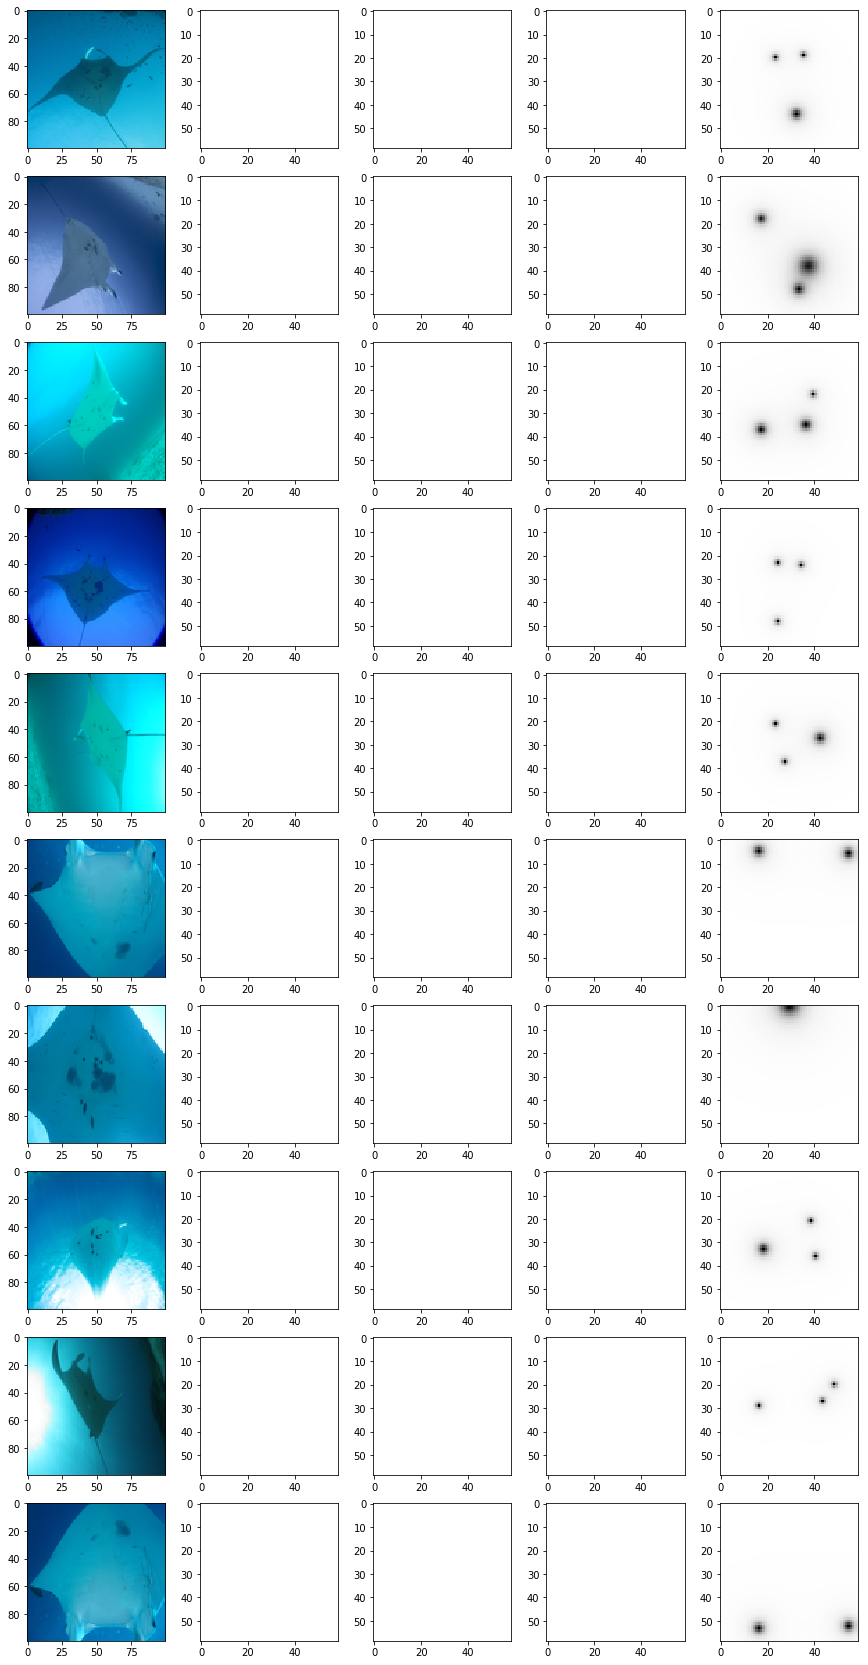

In [24]:
n=10#X_test.shape[0]
samples=random.sample(list(np.arange(pred.shape[0])),n)
fig, axes = plt.subplots(nrows=n, ncols=5,figsize=(15, 30))
for i,s in zip(range(len(samples)),samples):
    axes[i,0].imshow(mfp.denormalize(X_test[s]))
    axes[i,1].imshow(pred[s][:,:,0],cmap='Greys')
    axes[i,2].imshow(pred[s][:,:,1],cmap='Greys')
    #axes[i,3].imshow(pred[s][:,:,2],cmap='Greys')
    axes[i,3].imshow(pred[s][:,:,4],cmap='Greys')
    axes[i,4].imshow(y_test[s][:,:,[0,1,4]].sum(axis=2),cmap='Greys')
plt.show()